<a href="https://colab.research.google.com/github/sakshipradeep03/EDA-Assignment/blob/main/Exploratory_Data_Analysis_DA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis (EDA)
## Digital Assignment

### Topic: Data Exploration and Model Development in Python
#### By Sakshi Pradeep (21BDS0108)

---

### Objective
The aim of this assignment is to analyze a dataset using Python, following a systematic approach through data exploration, preprocessing, statistical analysis, and model development.

### Github link: https://github.com/sakshipradeep03/EDA-Assignment
---

### Import Necessary Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from scipy.stats import zscore
from sklearn.preprocessing import OneHotEncoder

### Load and explore the dataset

In [ ]:

df = pd.read_csv('CASchools.csv', index_col='rownames')

# Data Exploration
print("Dataset Dimensions:", df.shape)
print("\nDataset Summary:")

# provide statistical summary for quick insights into the data's distribution
print(df.describe())


Dataset Dimensions: (420, 14)

Dataset Summary:
           district      students     teachers    calworks       lunch  \
count    420.000000    420.000000   420.000000  420.000000  420.000000   
mean   67472.809524   2628.792857   129.067376   13.246042   44.705237   
std     3466.994655   3913.104985   187.912679   11.454821   27.123381   
min    61382.000000     81.000000     4.850000    0.000000    0.000000   
25%    64307.750000    379.000000    19.662499    4.395375   23.282200   
50%    67760.500000    950.500000    48.564999   10.520450   41.750700   
75%    70419.000000   3008.000000   146.350002   18.981350   66.864725   
max    75440.000000  27176.000000  1429.000000   78.994202  100.000000   

          computer  expenditure      income     english        read  \
count   420.000000   420.000000  420.000000  420.000000  420.000000   
mean    303.383333  5312.407541   15.316588   15.768155  654.970477   
std     441.341298   633.937053    7.225890   18.285927   20.107980   
m

### Data Handling and Cleaning

In [ ]:
print("\nHandling Missing Values:")

# Fill missing values using Maximum Likelihood Estimation (MLE) as a reliable method for missing data
numeric_cols = df.select_dtypes(include=np.number).columns

imputer = SimpleImputer(strategy='mean')
df[numeric_cols] = imputer.fit_transform(df[numeric_cols])

# Outlier detection and removal: removing extreme outliers using z-score with a threshold of 3 to retain relevant data
df = df[(np.abs(zscore(df.select_dtypes(include=[np.number]))) < 3).all(axis=1)]

df.head()


Handling Missing Values:


,district,school,county,grades,students,teachers,calworks,lunch,computer,expenditure,income,english,read,math
rownames,,,,,,,,,,,,,,
1,75119.0,Sunol Glen Unified,Alameda,KK-08,195.0,10.90,0.510200,2.040800,67.0,6384.911133,22.690001,0.000000,691.599976,690.000000
2,61499.0,Manzanita Elementary,Butte,KK-08,240.0,11.15,15.416700,47.916698,101.0,5099.380859,9.824000,4.583333,660.500000,661.900024
4,61457.0,Golden Feather Union Elementary,Butte,KK-08,243.0,14.00,36.475399,77.049202,85.0,7101.831055,8.978000,0.000000,651.900024,643.500000
5,61523.0,Palermo Union Elementary,Butte,KK-08,1335.0,71.50,33.108601,78.427002,171.0,5235.987793,9.080333,13.857677,641.799988,639.900024
6,62042.0,Burrel Union Elementary,Fresno,KK-08,137.0,6.40,12.318800,86.956497,25.0,5580.146973,10.415000,12.408759,605.700012,605.400024


### Correlation Analysis and Time Series Analysis


Univariate Analysis:


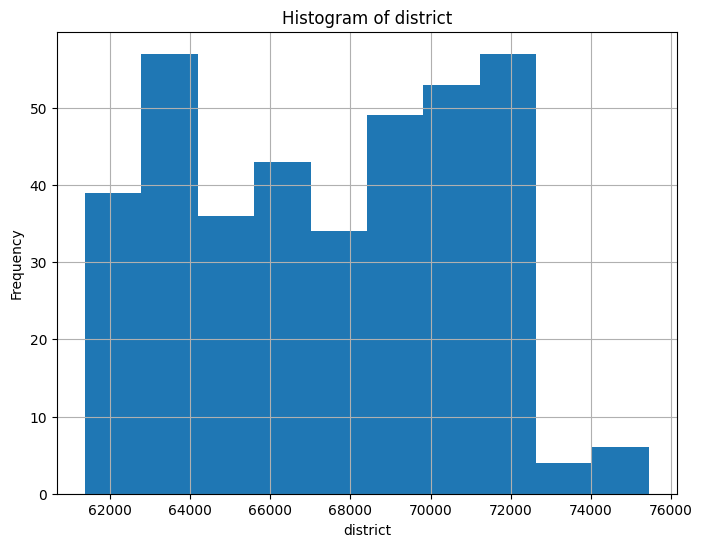

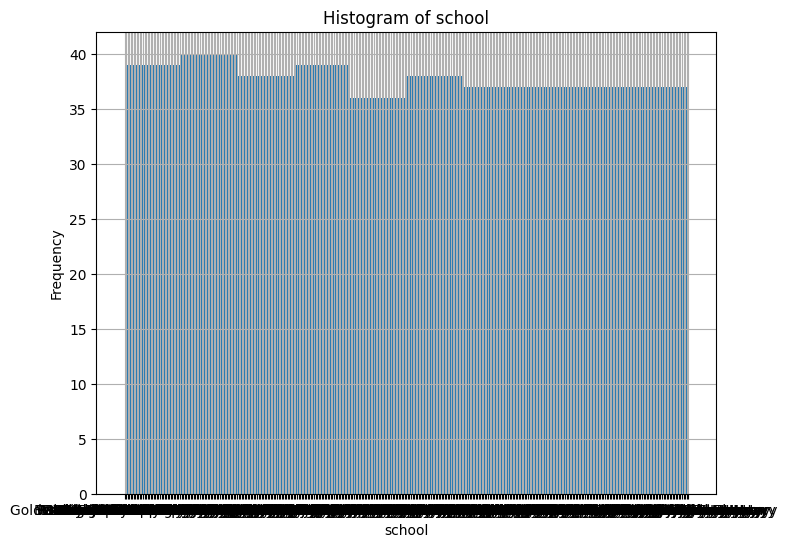

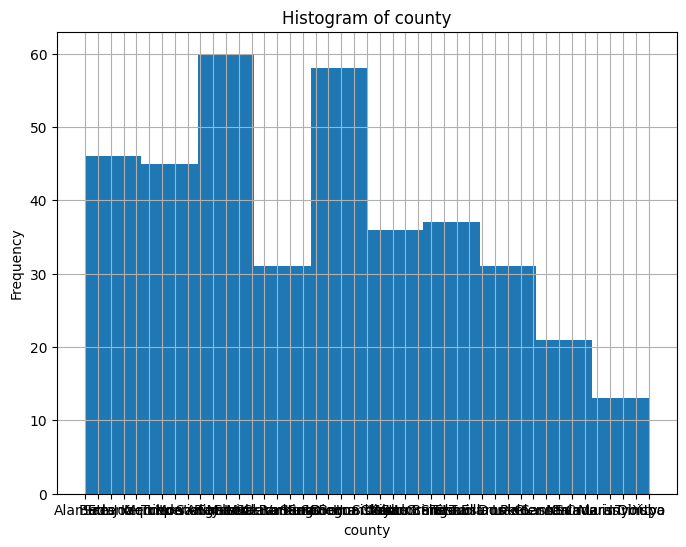

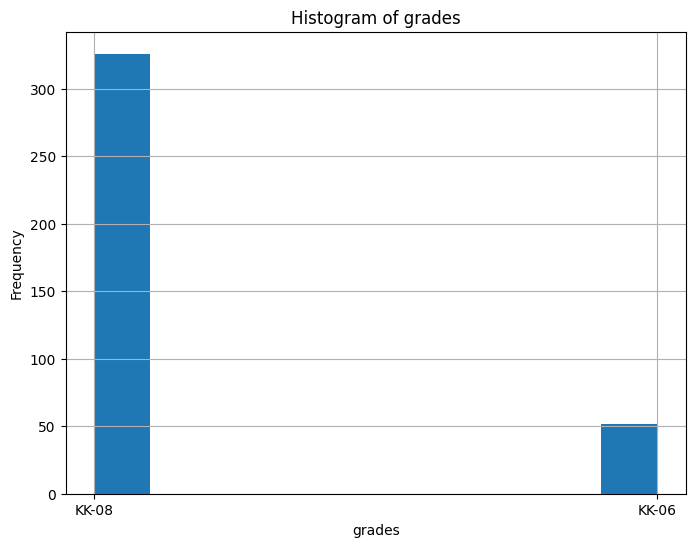

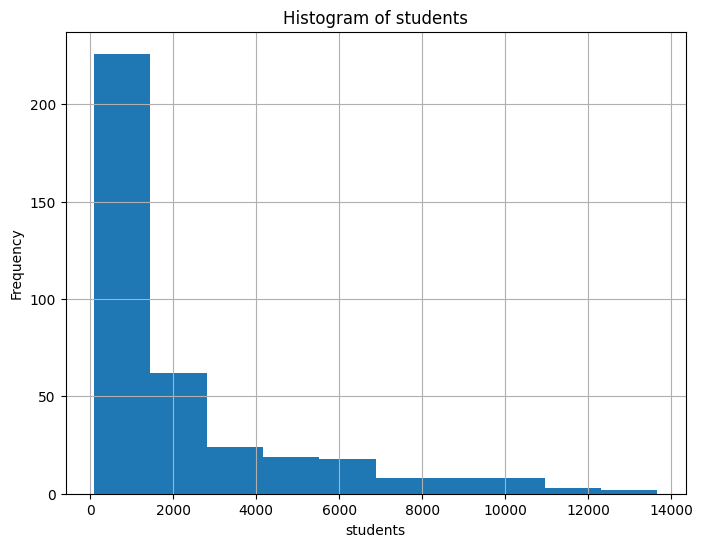

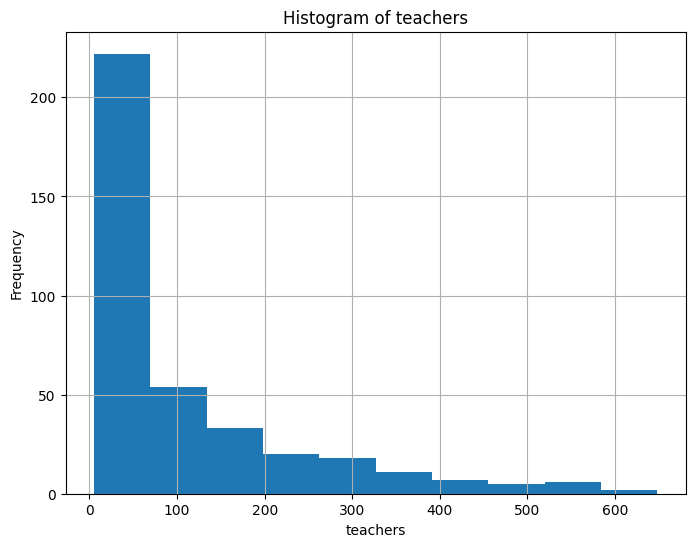

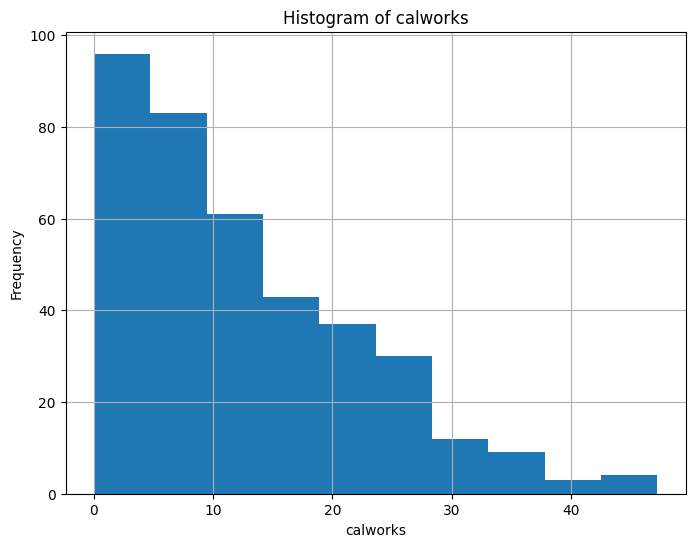

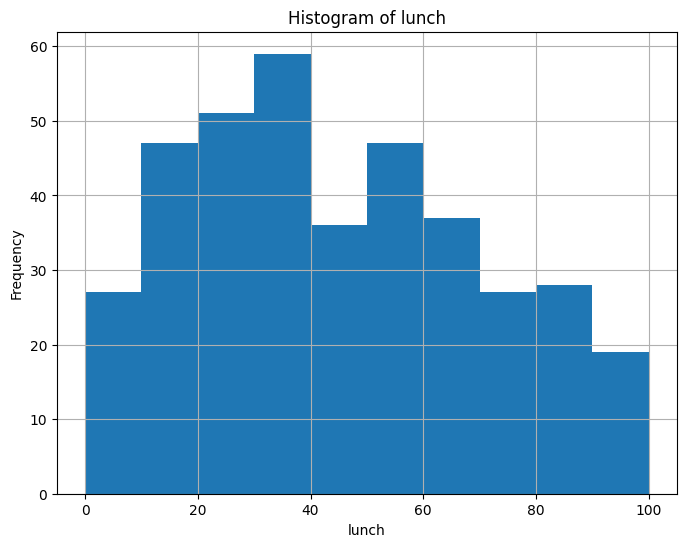

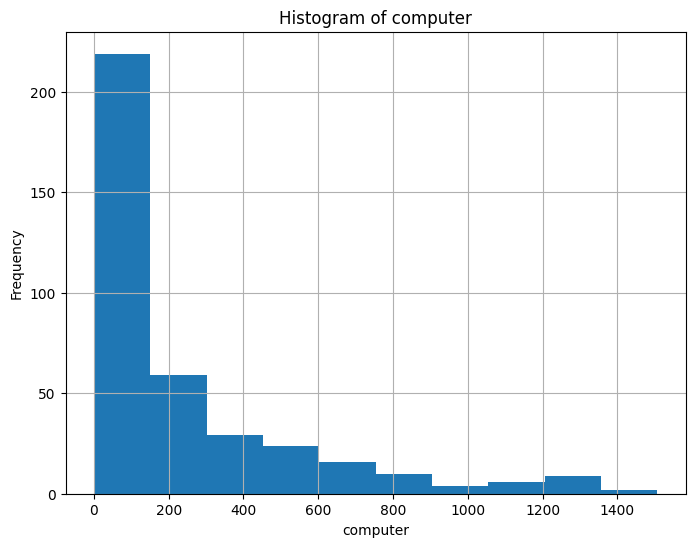

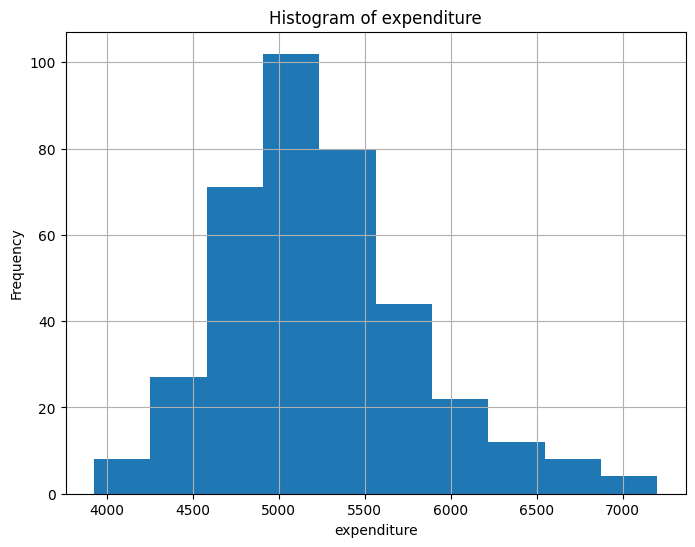

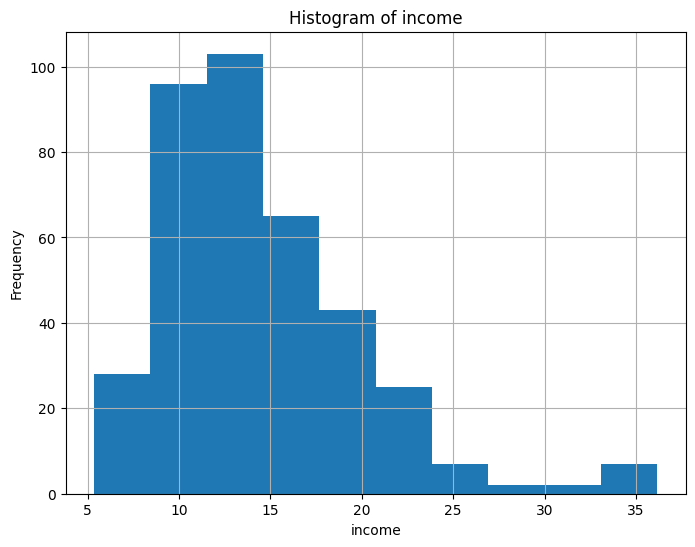

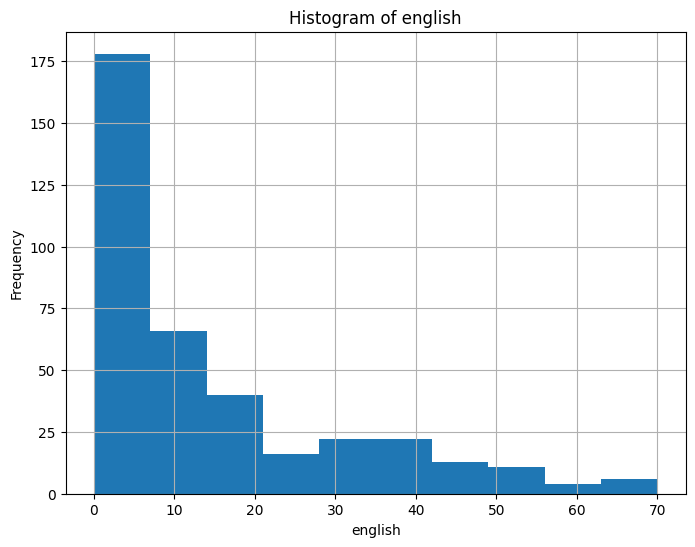

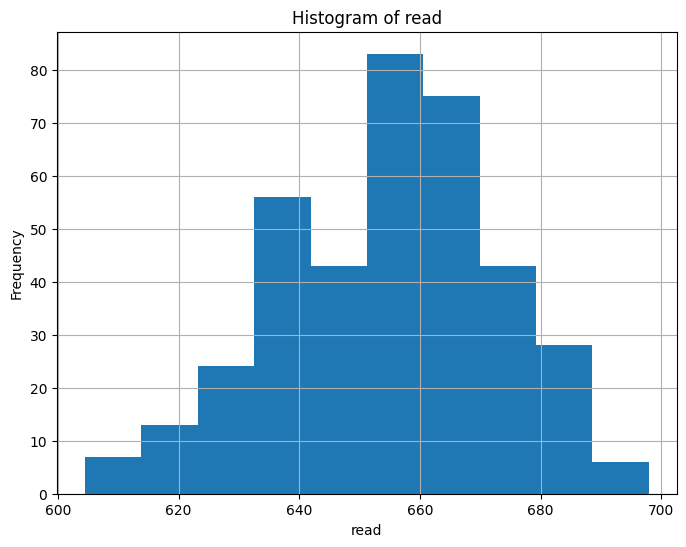

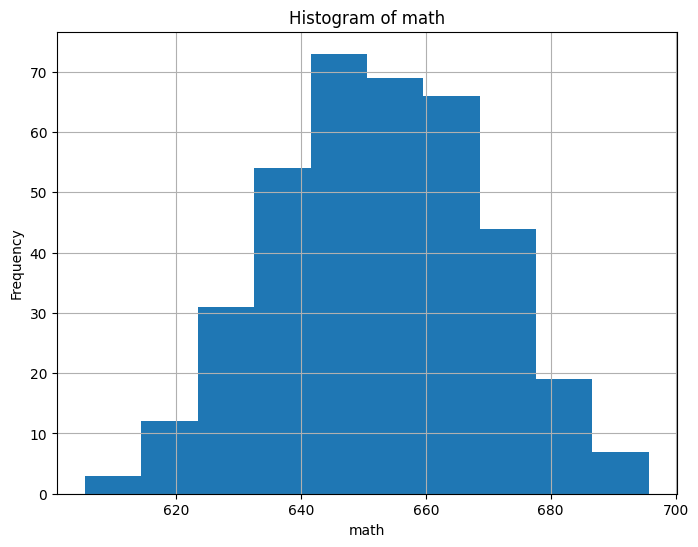

In [ ]:
# Univariate Analysis
print("\nUnivariate Analysis:")

# Visualizing individual features to understand their distributions
for col in df.columns:
    plt.figure(figsize=(8, 6))
    df[col].hist()
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()



Bivariate Analysis:


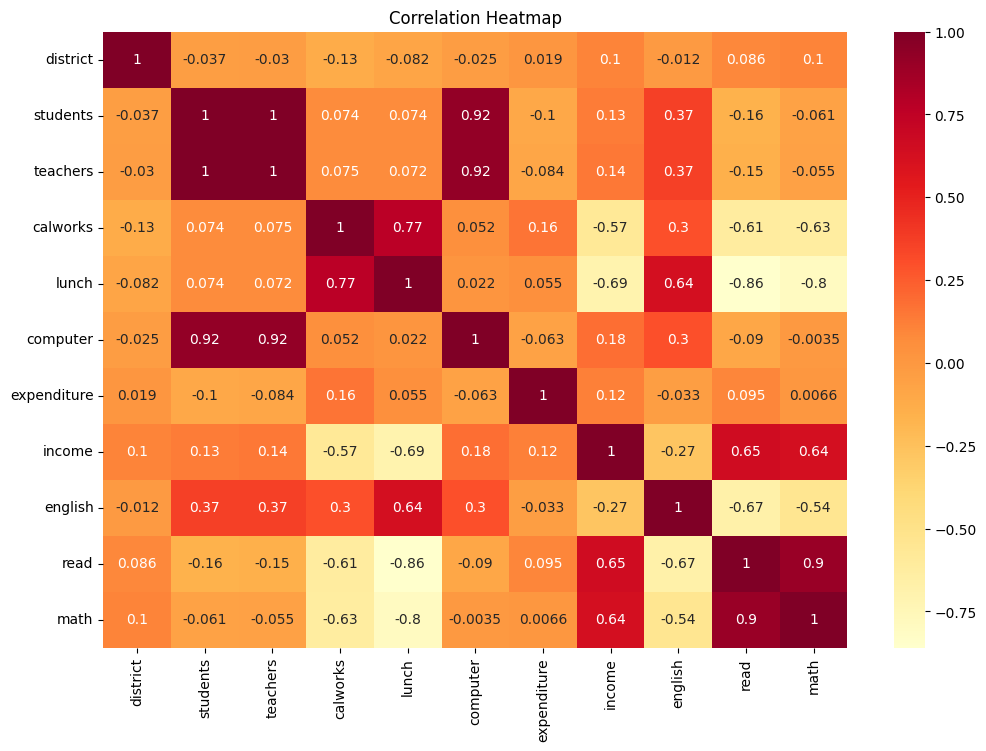

In [ ]:
# Bivariate Analysis
print("\nBivariate Analysis:")

numeric_df = df.select_dtypes(include=np.number)

# visualizes relationships between features, assisting in identifying highly correlated pairs
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='YlOrRd')
plt.title("Correlation Heatmap")
plt.show()


Scatter and Bar Plots for Bivariate Analysis:


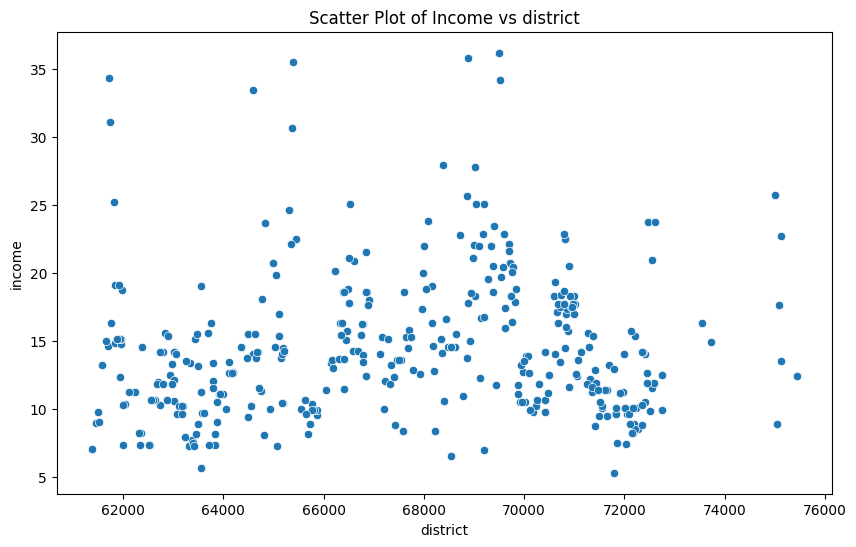

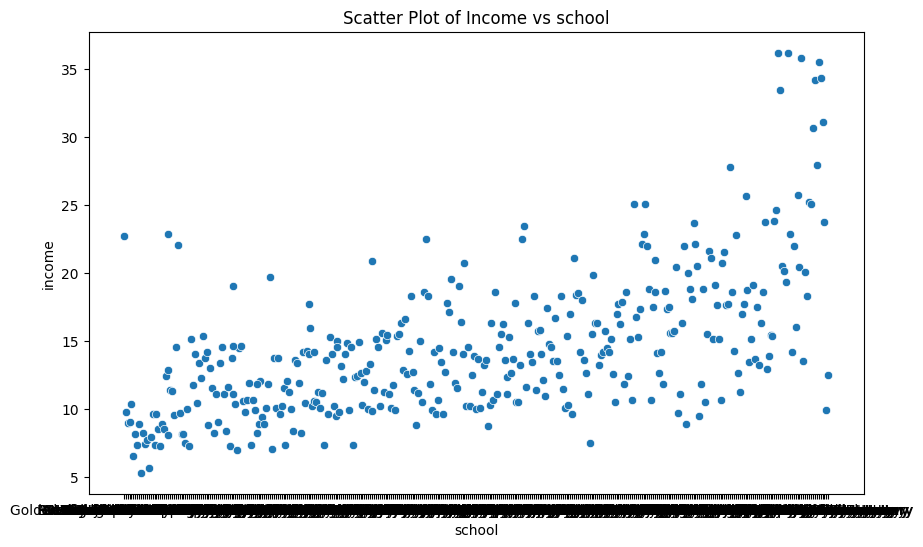

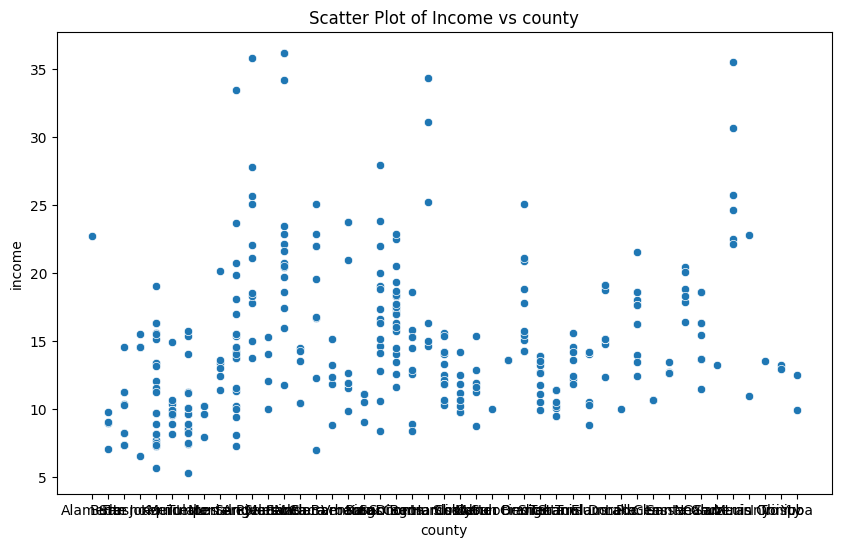

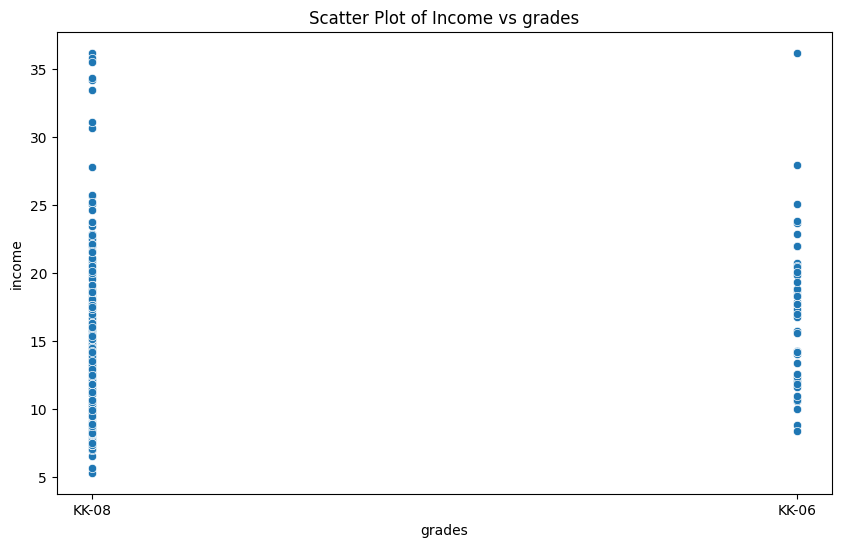

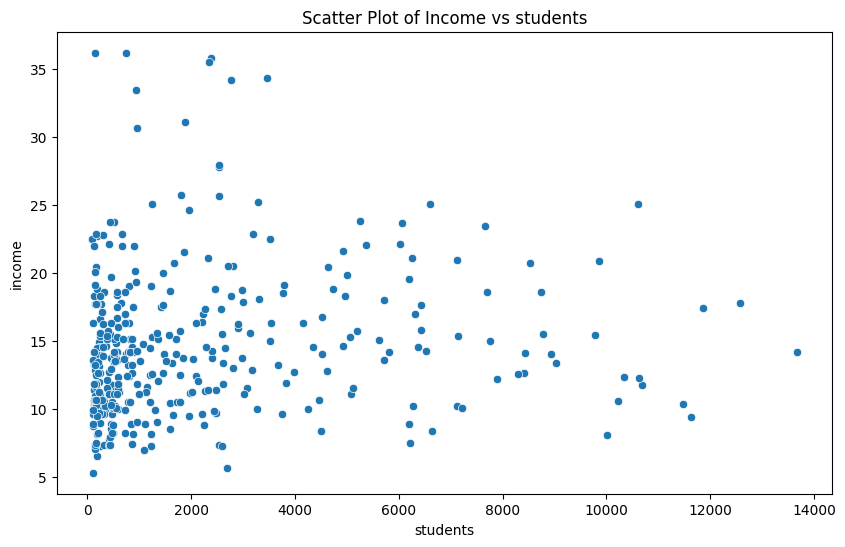

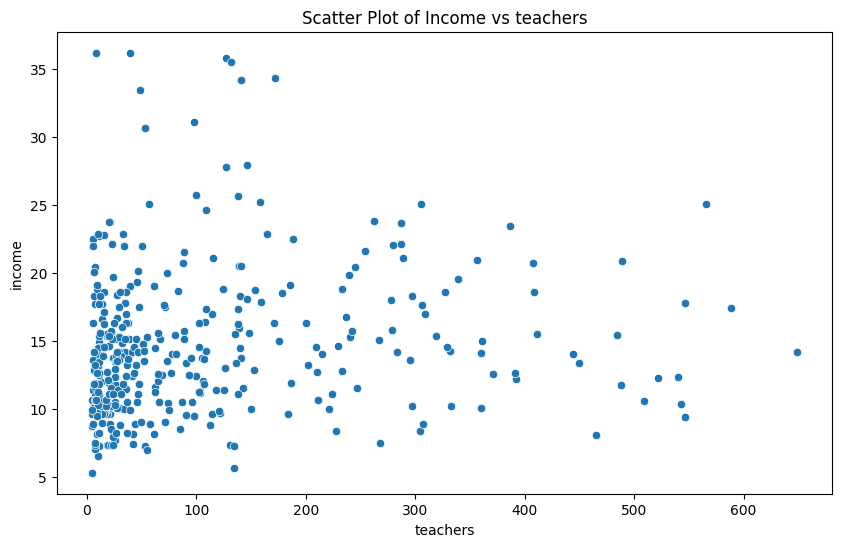

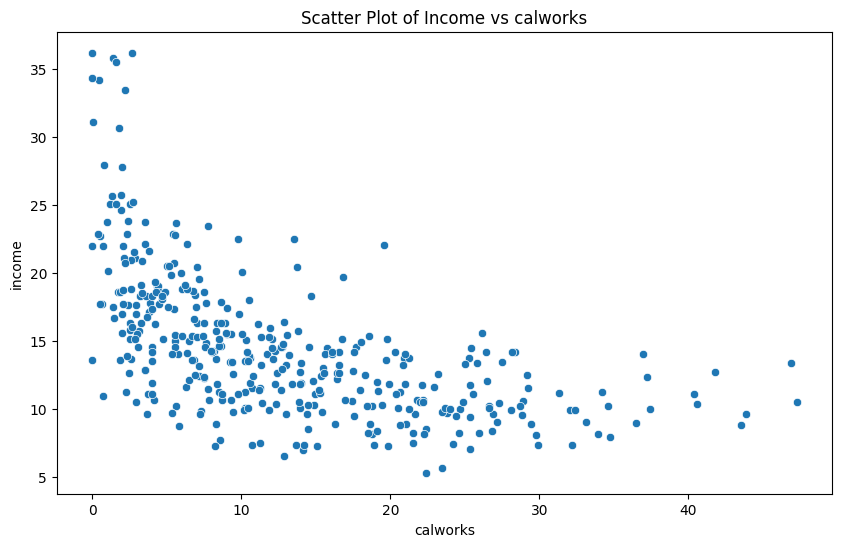

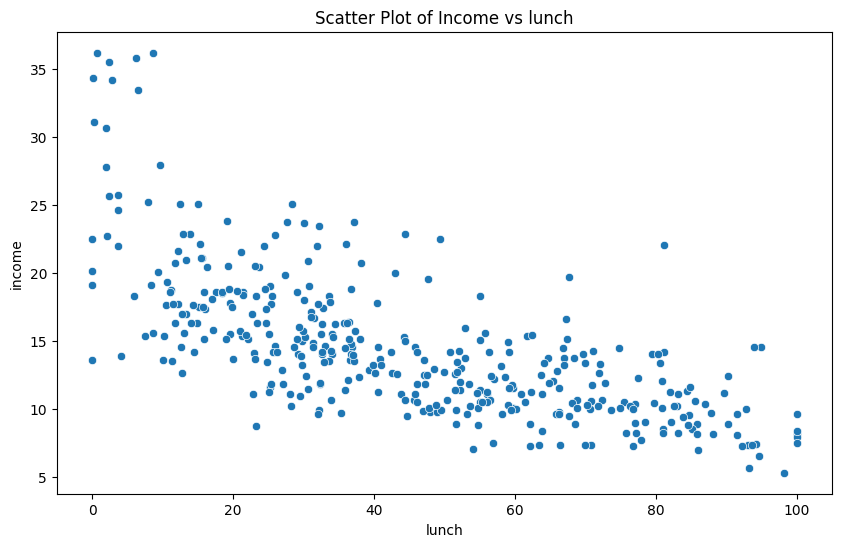

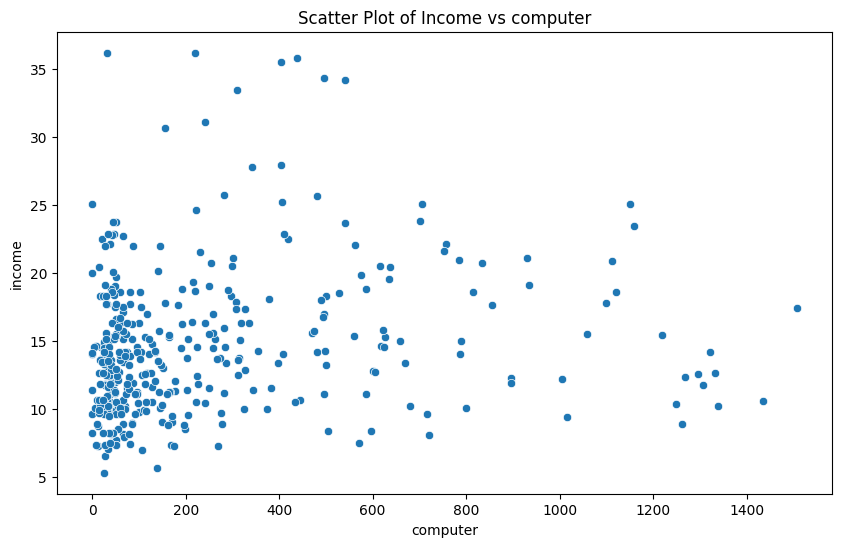

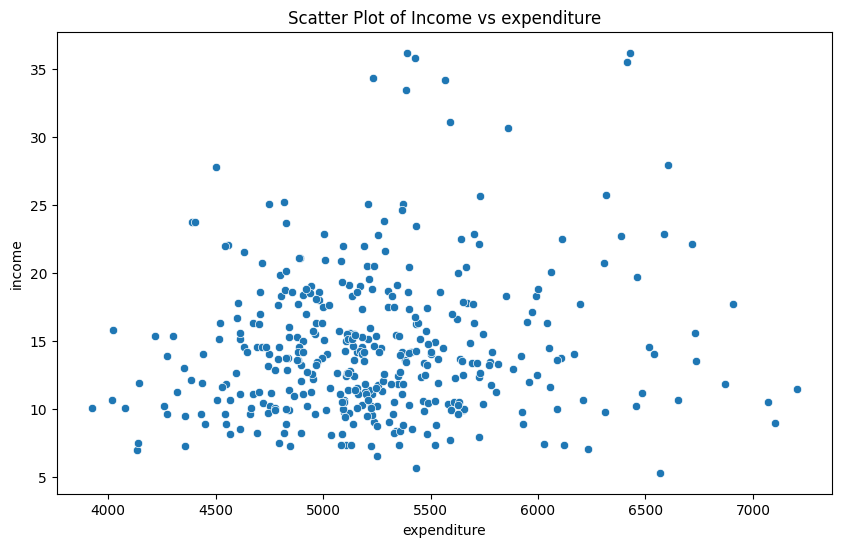

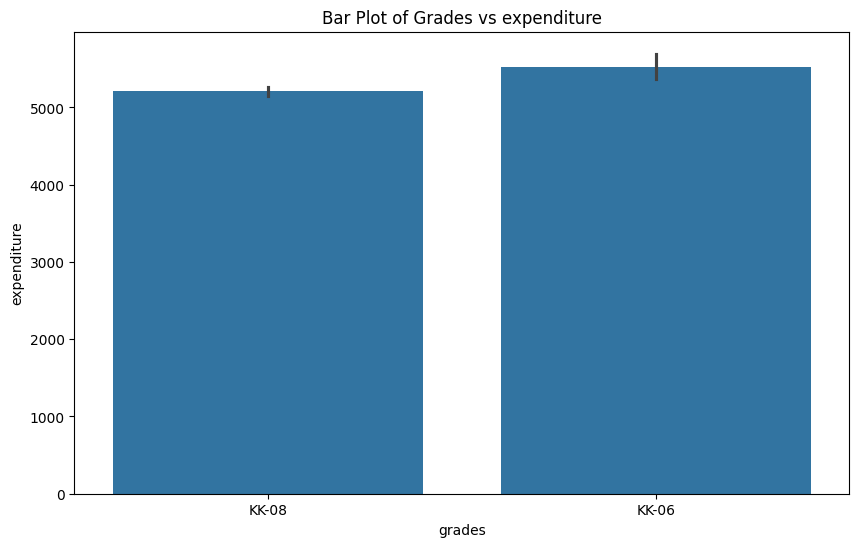

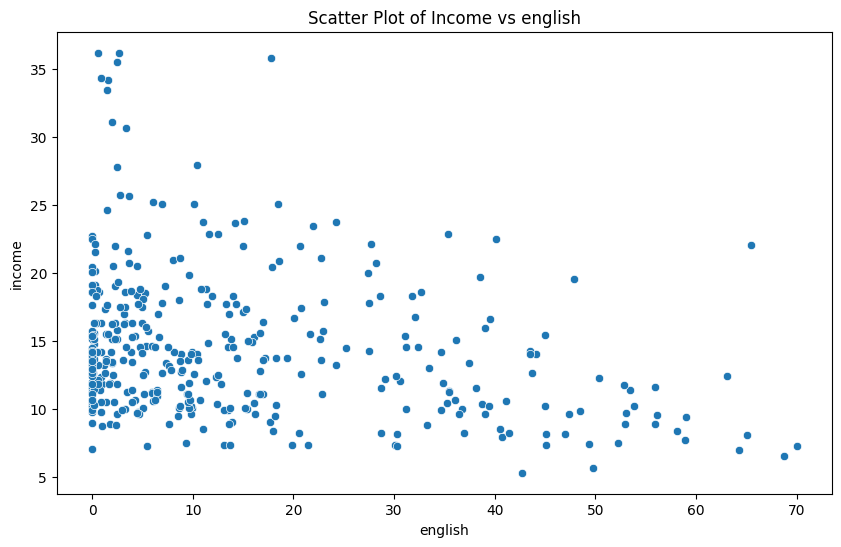

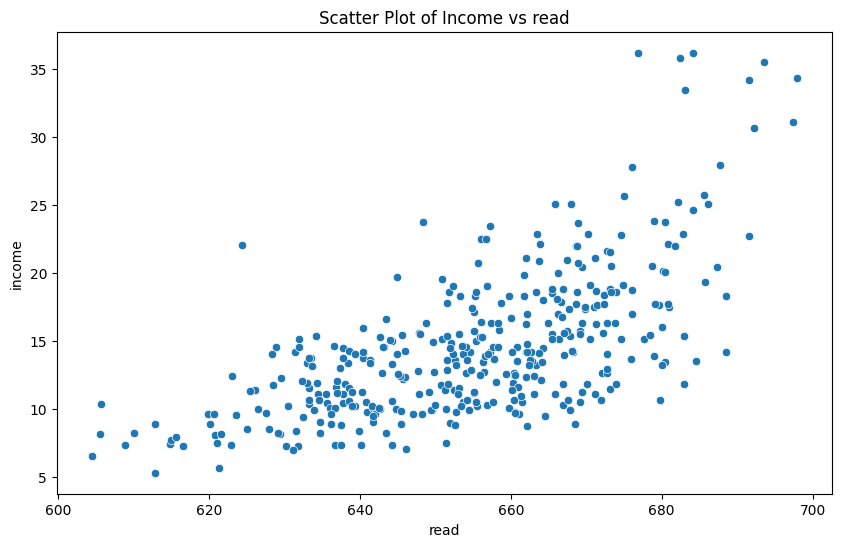

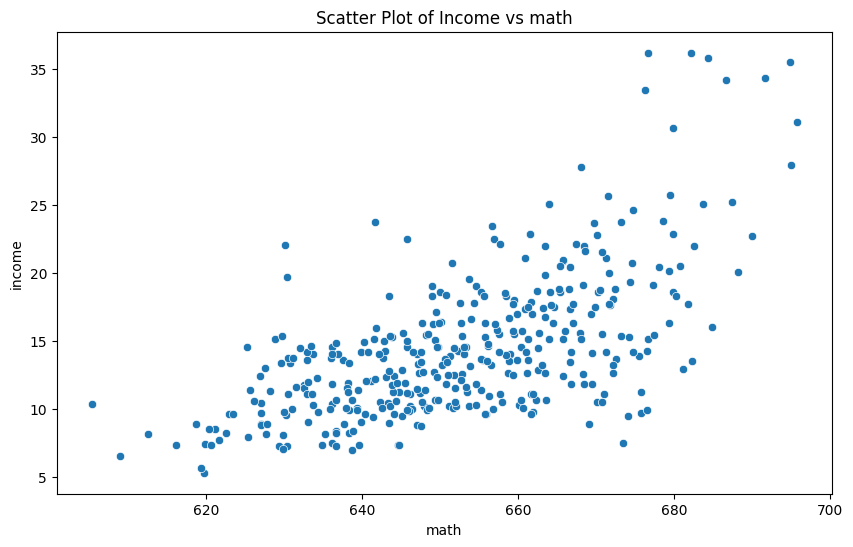

In [ ]:
# examines specific relationships between variables like income and expenditure
print("\nScatter and Bar Plots for Bivariate Analysis:")
for col in df.columns:
    if col != 'income':
        plt.figure(figsize=(10, 6))
        sns.scatterplot(x=col, y='income', data=df)
        plt.title(f"Scatter Plot of Income vs {col}")
        plt.show()
    if col == 'expenditure':
        plt.figure(figsize=(10, 6))
        sns.barplot(x='grades', y=col, data=df)
        plt.title(f"Bar Plot of Grades vs {col}")
        plt.show()



Multivariate Analysis using PCA:


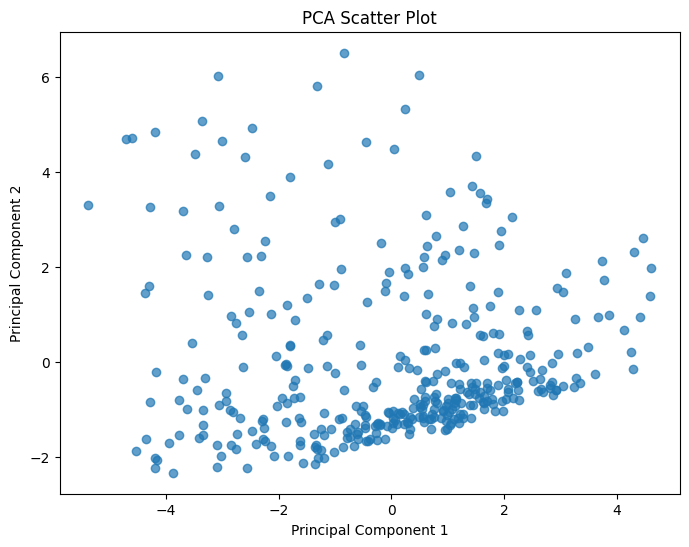

In [ ]:
# Multivariate Analysis using PCA
print("\nMultivariate Analysis using PCA:")

numerical_features = df.select_dtypes(include=np.number).columns
numerical_df = df[numerical_features] # Create a new DataFrame with only the selected columns

scaler = StandardScaler()

scaled_df = scaler.fit_transform(numerical_df)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(scaled_df)
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.7)
plt.title("PCA Scatter Plot")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

 ### Data Summarization and Visualization

In [ ]:
print("\nData Transformation: Performing deduplication, discretization, and binning")
df.drop_duplicates(inplace=True)

# Binning income into 4 categories to make it easier to analyze trends across income levels
df['income_bins'] = pd.qcut(df['income'], 4, labels=['Low', 'Mid-Low', 'Mid-High', 'High'])

df.head()



Data Transformation: Performing deduplication, discretization, and binning


,district,school,county,grades,students,teachers,calworks,lunch,computer,expenditure,income,english,read,math,income_bins
rownames,,,,,,,,,,,,,,,
1,75119.0,Sunol Glen Unified,Alameda,KK-08,195.0,10.90,0.510200,2.040800,67.0,6384.911133,22.690001,0.000000,691.599976,690.000000,High
2,61499.0,Manzanita Elementary,Butte,KK-08,240.0,11.15,15.416700,47.916698,101.0,5099.380859,9.824000,4.583333,660.500000,661.900024,Low
4,61457.0,Golden Feather Union Elementary,Butte,KK-08,243.0,14.00,36.475399,77.049202,85.0,7101.831055,8.978000,0.000000,651.900024,643.500000,Low
5,61523.0,Palermo Union Elementary,Butte,KK-08,1335.0,71.50,33.108601,78.427002,171.0,5235.987793,9.080333,13.857677,641.799988,639.900024,Low
6,62042.0,Burrel Union Elementary,Fresno,KK-08,137.0,6.40,12.318800,86.956497,25.0,5580.146973,10.415000,12.408759,605.700012,605.400024,Low


### Clsutering Algorithms


Model-Based Clustering using Expectation-Maximization (Gaussian Mixture Model):


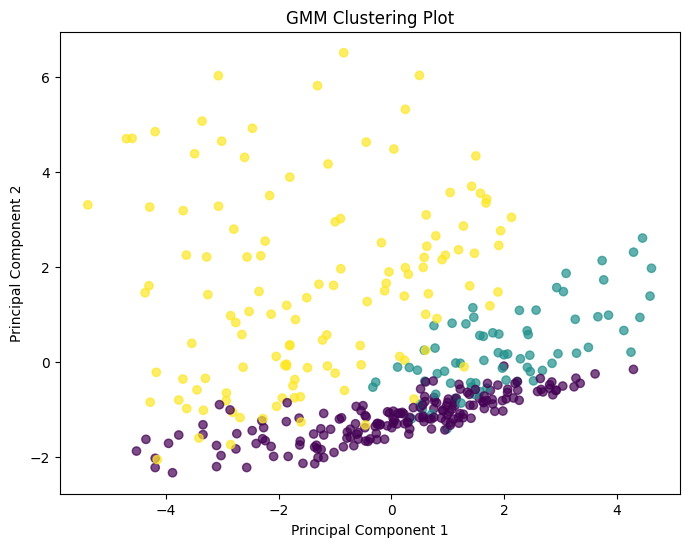

In [ ]:
print("\nModel-Based Clustering using Expectation-Maximization (Gaussian Mixture Model):")

# Using Gaussian Mixture Model for more sophisticated clustering, ideal for complex data distributions
gmm = GaussianMixture(n_components=3, random_state=42)
gmm_labels = gmm.fit_predict(scaled_df)
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=gmm_labels, cmap='viridis', alpha=0.7)
plt.title("GMM Clustering Plot")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()


### Model Development and Evaluation


In [ ]:
print("\nModel Development and Evaluation:")
X = df.drop('read', axis=1)
y = df['read']

# create a OneHotEncoder object
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# a list of all categorical columns in the DataFrame 'X'
categorical_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()

# fit the encoder to the categorical features and transform them
X_cat = X[categorical_cols].reset_index(drop=True)
encoded_data = encoder.fit_transform(X_cat)

encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_cols))

X_num = X.drop(categorical_cols, axis=1).reset_index(drop=True)
X_encoded = pd.concat([X_num, encoded_df], axis=1)

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y.reset_index(drop=True), test_size=0.3, random_state=42)

# train the model
model = LinearRegression()
model.fit(X_train, y_train)

# model evaluation
y_pred = model.predict(X_test)
print("Model Coefficients:", model.coef_)
print("Model Intercept:", model.intercept_)
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
print("R-squared Score:", r2_score(y_test, y_pred))


Model Development and Evaluation:
Model Coefficients: [ 1.29381327e-05 -3.44863264e-03  5.86392016e-02 -4.40356867e-02
 -1.57182495e-01  4.36814445e-03  1.47375738e-04  3.85101847e-01
 -1.87600824e-01  5.44554518e-01  5.35408956e+00  1.13716092e+00
  4.18154400e-12  7.32969241e-12 -3.73526727e+00  3.36528930e-01
 -1.73245307e-11  1.63957736e-12  9.06830167e-13  5.58995971e+00
  2.52742272e-12  4.63178368e+00  8.47102715e+00 -2.08830231e+00
  5.25842199e-01 -1.84011098e+00 -4.08405265e+00 -2.53888113e+00
  2.34784198e+00 -1.54902676e+00  5.90638649e-14  1.48681067e-12
  2.20268248e-13 -9.37298537e-01  4.47641924e-13  2.61217958e+00
 -1.90514271e-13  5.70654635e-13  8.92619312e-14 -1.47881707e-13
 -1.12961371e+00  4.75970032e+00  1.81210730e+00 -1.30118138e-13
  4.34185772e+00 -1.07025500e-13  7.84844296e-01  7.99871954e-01
 -3.05866443e-14 -1.56253459e+01 -9.05204518e-01 -4.14308134e+00
  4.57466432e+00 -1.14797061e-13  6.18172180e-13  2.80963724e+00
  7.97035926e+00 -1.19759937e+00 -7